<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Outliers

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from ydata_profiling import ProfileReport

In [142]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [143]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
"""

'\nПредварительно - оптимизируйте ваш набор данных.\n1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)\n2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)\n3. Скопируйте df в df_cluster # df_cluster = df.copy()\nдалее вы работаете с ним\n4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler\n5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html\n'

In [145]:
df_clear = df

# Чистим от NaN
df_clear = df_clear.dropna()
df_clear = df_clear.reset_index(drop=True)

df_clear_clss = Outliers.Outline(df_clear)

# Чистим от выбросов
df_outliers_drop = df_clear_clss.filter_outliers_by_median('RestingBP')
df_outliers_clear = df_clear.drop(index=df_outliers_drop)
df_outliers_clear = df_outliers_clear.reset_index(drop=True)
df_outliers_clear

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
872,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
873,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
874,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [146]:
df_outliers_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             876 non-null    int64  
 1   Sex             876 non-null    object 
 2   ChestPainType   876 non-null    object 
 3   RestingBP       876 non-null    int64  
 4   Cholesterol     876 non-null    int64  
 5   FastingBS       876 non-null    int64  
 6   RestingECG      876 non-null    object 
 7   MaxHR           876 non-null    int64  
 8   ExerciseAngina  876 non-null    object 
 9   Oldpeak         876 non-null    float64
 10  ST_Slope        876 non-null    object 
 11  HeartDisease    876 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 82.3+ KB


In [147]:
df_cluster = df_outliers_clear.copy()
#df_cluster


# Нужно, чтобы не плодить лишние переменные
df_cluster = df_cluster.astype({'Age': 'float64',
                                'RestingBP': 'float64',
                                'Cholesterol': 'float64',
                                'FastingBS': 'float64',
                                'MaxHR': 'float64',
                                'HeartDisease': 'float64'
                                })

num_features_float = df_cluster.select_dtypes(include=['float64']).columns
cat_features_obj = df_cluster.select_dtypes(include=['object']).columns

scaler_std = StandardScaler()
df_cluster[num_features_float] = scaler_std.fit_transform(df_cluster[num_features_float])

label_enocore = LabelEncoder()
#df_cluster[cat_features_obj] = label_enocore.fit_transform(df_cluster[cat_features_obj])

for i in df_cluster[cat_features_obj]:
    df_cluster[i] = label_enocore.fit_transform(df_cluster[i])

df_cluster



#df_cluster.info()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.409049,1,1,0.626847,0.831538,-0.545690,1,1.377493,0,-0.824441,2,-1.09843
1,-0.458104,0,2,1.945415,-0.171590,-0.545690,1,0.746568,0,0.123590,1,0.91039
2,-1.726031,1,1,-0.032437,0.776320,-0.545690,2,-1.540536,0,-0.824441,2,-1.09843
3,-0.563765,0,0,0.494990,0.141312,-0.545690,1,-1.146208,1,0.597606,1,0.91039
4,0.070199,1,2,1.286131,-0.033545,-0.545690,1,-0.594148,0,-0.824441,2,-1.09843
...,...,...,...,...,...,...,...,...,...,...,...,...
871,-0.880746,1,3,-1.351005,0.601463,-0.545690,1,-0.199820,0,0.313197,1,0.91039
872,1.549448,1,0,0.890560,-0.051951,1.832542,1,0.155075,0,2.398866,1,0.91039
873,0.387181,1,0,-0.032437,-0.622537,-0.545690,1,-0.870178,1,0.313197,1,0.91039
874,0.387181,0,1,-0.032437,0.343779,-0.545690,0,1.456359,0,-0.824441,1,0.91039


In [148]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

'\nЗдесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.\n'

Найденный кластер: 4
Баллы найденного: 0.36190816709555107


Text(0, 0.5, 'Баллы')

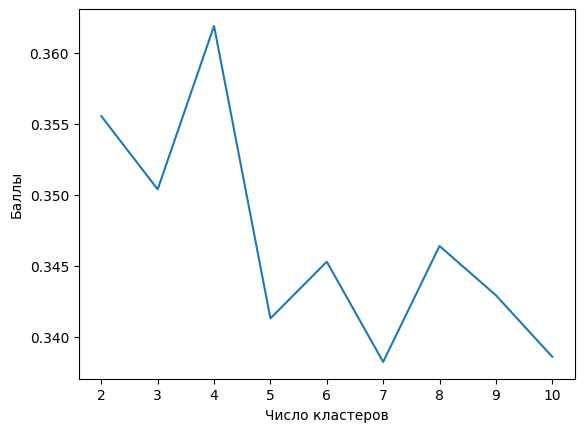

In [150]:
scaler = StandardScaler()
df_cluster_scaler = scaler.fit_transform(df_cluster[['Age', 'RestingBP']])
scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_cluster_scaler)
    score = silhouette_score(df_cluster_scaler, kmeans.labels_)
    scores.append(score)

print(f'Найденный кластер: {scores.index(max(scores)) + 2}\nБаллы найденного: {max(scores)}')

plt.plot(range(2, 11), scores)
plt.xlabel('Число кластеров')
plt.ylabel('Баллы')

Найденный кластер: 4
Баллы найденного: 642.925571670141


Text(0, 0.5, 'Баллы')

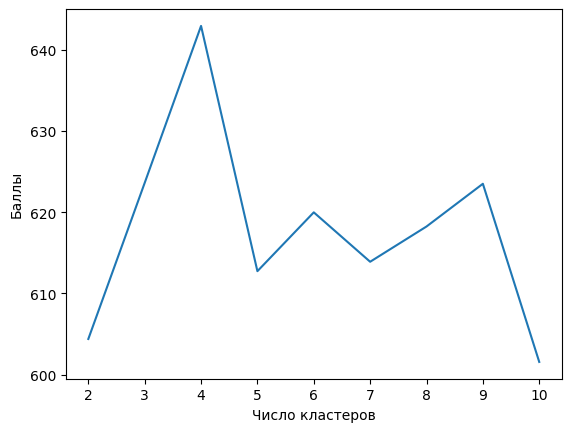

In [151]:
df_cluster_kmeans = df_cluster[['Age', 'RestingBP']]
scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_cluster_kmeans)
    score = calinski_harabasz_score(df_cluster_kmeans, kmeans.labels_)
    scores.append(score)

print(f'Найденный кластер: {scores.index(max(scores)) + 2}\nБаллы найденного: {max(scores)}')

plt.plot(range(2, 11), scores)
plt.xlabel('Число кластеров')
plt.ylabel('Баллы')

Найденный кластер: 4
Баллы найденного: 0.8478305118246279


Text(0, 0.5, 'Баллы')

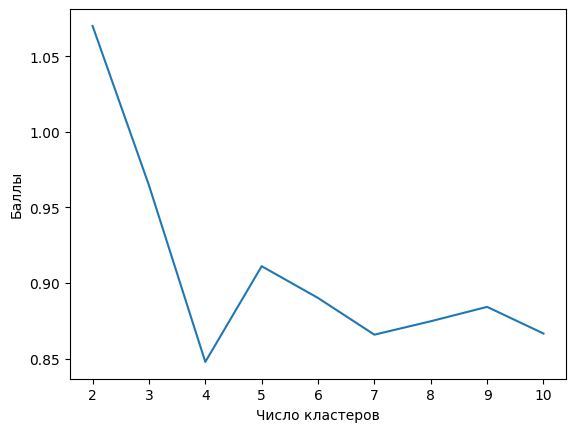

In [152]:
df_cluster_kmeans2 = df_cluster[['Age', 'RestingBP']]
scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_cluster_kmeans2)
    score = davies_bouldin_score(df_cluster_kmeans2, kmeans.labels_)
    scores.append(score)

print(f'Найденный кластер: {scores.index(min(scores)) + 2}\nБаллы найденного: {min(scores)}')

plt.plot(range(2, 11), scores)
plt.xlabel('Число кластеров')
plt.ylabel('Баллы')

In [153]:
df_cluster['Age'].unique()

array([-1.4090495 , -0.45810392, -1.72603136, -0.56376454,  0.07019918,
       -1.51471012, -0.8807464 ,  0.49284166, -1.19772826, -1.62037074,
       -1.09206764,  0.7041629 , -1.83169198, -0.98640702, -0.03546144,
       -0.14112206, -0.24678268,  0.28152042, -1.30338888, -2.25433446,
        1.232466  , -1.9373526 ,  0.59850228, -0.3524433 , -0.66942516,
       -2.35999508, -0.77508578,  0.38718104,  0.1758598 ,  1.02114476,
        1.33812662, -2.04301322, -2.14867384,  0.80982352, -2.57131631,
        0.91548414, -2.67697693,  2.18341157,  1.54944786,  1.97209033,
        1.12680538,  1.65510848,  1.44378724,  2.07775095,  1.76076909,
        2.50039343,  2.28907219,  2.39473281,  1.86642971])

/home/kiwi_kam/Документы/С флешки/3 курс 2023/Машинное обучение/.machine_learn/lib64/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/kiwi_kam/Документы/С флешки/3 курс 2023/Машинное обучение/.machine_learn/lib64/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/kiwi_kam/Документы/С флешки/3 курс 2023/Машинное обучение/.machine_learn/lib64/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/kiwi_kam/Документы/С флешки/3 курс 2023/Маши

Найденный кластер: 2
Баллы найденного: 0.1294624700597875


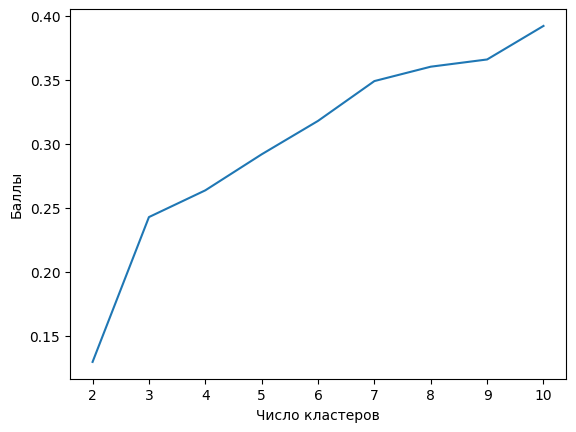

In [154]:
y_true = df_cluster['Age'].to_numpy()
scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_cluster_scaler)
    score = normalized_mutual_info_score(y_true, kmeans.labels_, average_method='arithmetic')
    scores.append(score)

plt.plot(range(2, 11), scores)
plt.xlabel('Число кластеров')
plt.ylabel('Баллы')

print(f'Найденный кластер: {scores.index(min(scores)) + 2}\nБаллы найденного: {min(scores)}')

#### Ответ

1. silhouette_score показал оптимальным число кластеров 4, однако по количеству баллов видно ( 0.35 < 0.5 ), что говорит о неудавшемся эксперименте.
2. calinski_harabasz_score так же показал оптимальные 4 кластера с баллами 642.9, показав наилучший результат.
3. davies_bouldin_score значения баллов показало (0.85), что наиболее оптимальное число кластеров равняется 4, несмотря на относительную конкуренцию для 7 и 10 кластеров, 4 кластеря является оптимальным.
4. normalized_mutual_info_score показал оптимальное число для 2 кластеров с 0.13 баллов. Данная метрика показалась очень странной, так как это самый низкий балл, среди остальных кластеров. Данную метрикой можно считать неудачной.

**Вывод**

Наиболее оптимальным числом кластеров будет являться 4.

In [155]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров k-means\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

/home/kiwi_kam/Документы/С флешки/3 курс 2023/Машинное обучение/.machine_learn/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


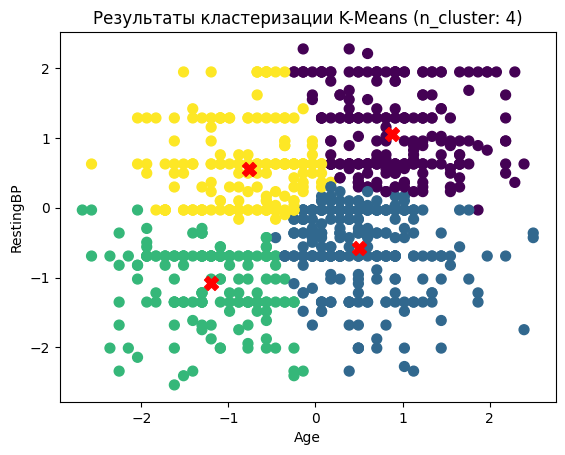

In [157]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_cluster_kmeans)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

plt.scatter(df_cluster_kmeans['Age'], df_cluster_kmeans['RestingBP'], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=100, marker='X')
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.title('Результаты кластеризации K-Means (n_cluster: 4)')
plt.show()

In [158]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

'\nЗдесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?\n'

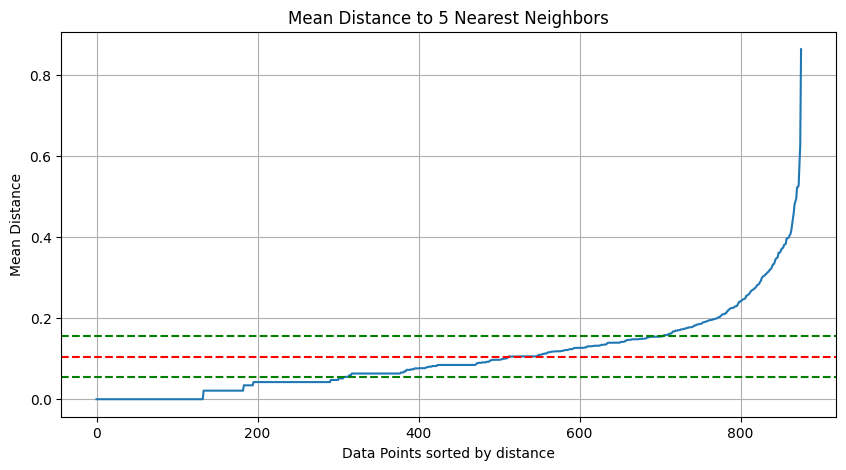

Оптимальный EPS = 0.10466560589627465


In [160]:
# Создаем пустой список, в который будем добавлять средние расстояния
neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(df_cluster_scaler):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1 - v2) for j, v2 in enumerate(df_cluster_scaler) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')

#### Ответ

Как видно на графике, были выявлены оптимальные границы EPS зеленой границей, а так же красным цветом выделена оптимальная линия EPS для DBSCAN.

In [161]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров DBSCAN\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

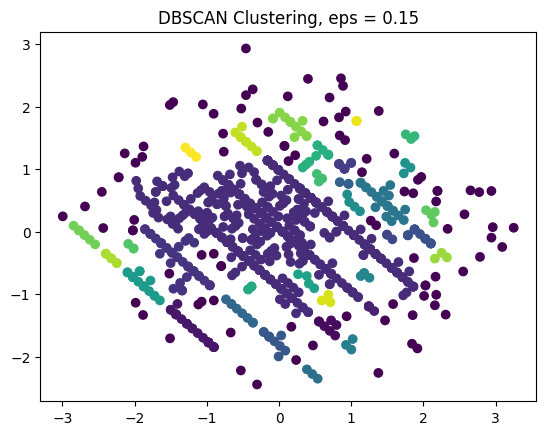

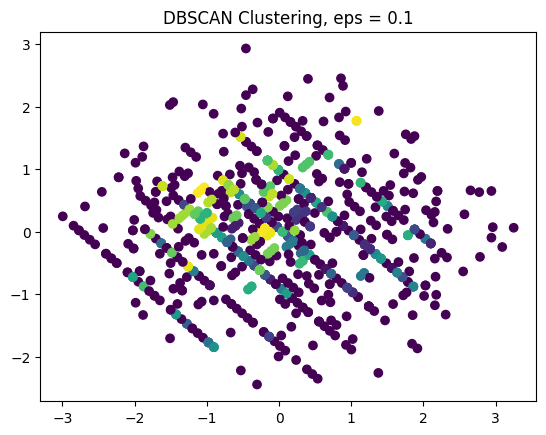

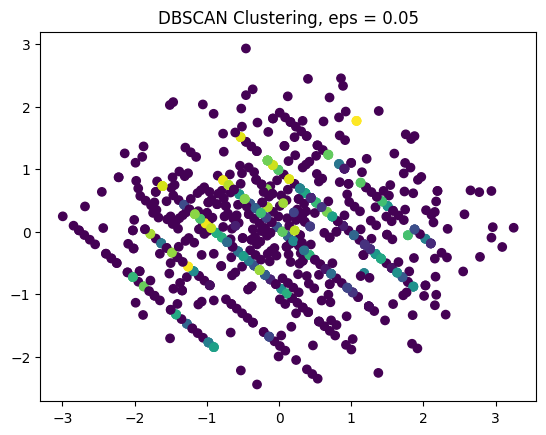

In [163]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_cluster_kmeans)

for eps in [np.mean(neighbours) + np.std(neighbours) / 2, np.mean(neighbours), np.mean(neighbours) - np.std(neighbours) / 2]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=3)
  dbscan.fit(data_pca)
  labels = dbscan.labels_

  # Визуализация результатов, темные точки - выбросы
  plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show()

In [164]:
"""
Здесь иерархическая кластеризация и метрики
"""

'\nЗдесь иерархическая кластеризация и метрики\n'

In [166]:
df_cluster_2 = df_cluster[['Age', 'RestingBP']]
scores = []

for k in range(2, 11):
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    agg_clustering.fit(df_cluster_2)
    score = calinski_harabasz_score(df_cluster_2, agg_clustering.labels_)
    scores.append(score)

print(f'Найденный кластер: {scores.index(min(scores)) + 2}\nБаллы найденного: {min(scores)}')

Найденный кластер: 3
Баллы найденного: 502.3461107218099


Text(0.5, 1.0, 'Agglomerative Clustering')

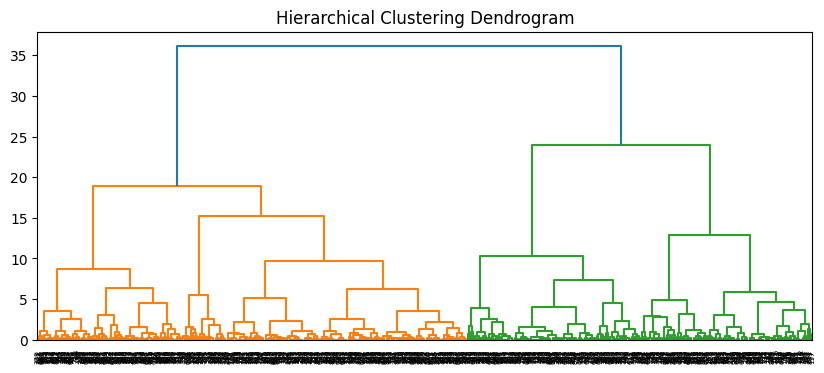

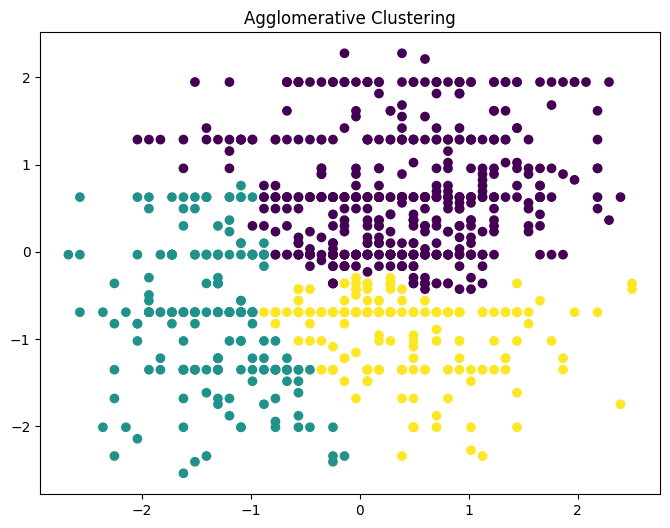

In [167]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(df_cluster_2)

plt.figure(figsize=(10, 4))
linkage_matrix = hierarchy.linkage(df_cluster_2, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')

plt.figure(figsize=(8, 6))
plt.scatter(df_cluster_2.to_numpy()[:, 0], df_cluster_2.to_numpy()[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')

In [168]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров иерархической кластеризации\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

Text(0.5, 1.0, 'PCA')

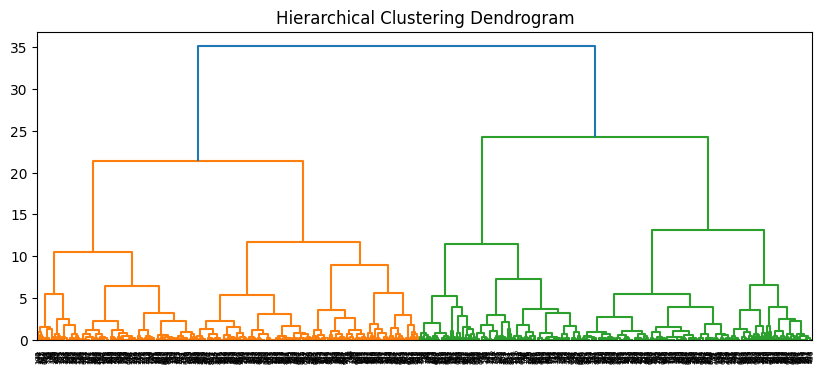

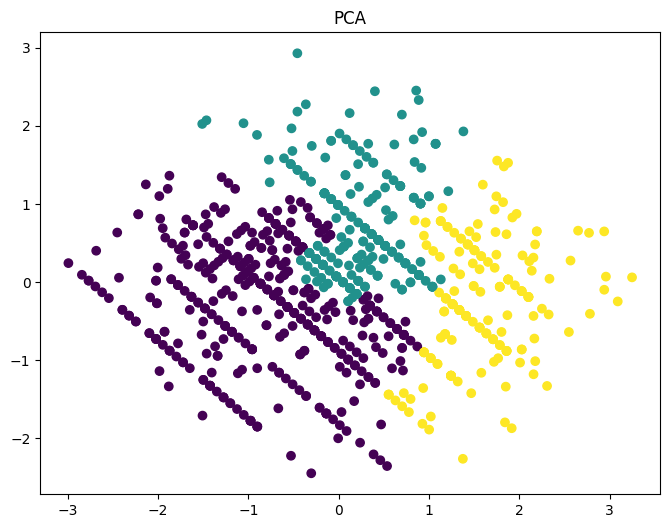

In [170]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_cluster_2)

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(data_pca)

plt.figure(figsize=(10, 4))
linkage_matrix = hierarchy.linkage(data_pca, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('PCA')

In [171]:
#!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [172]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



'\nНа отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма\n\nfrom ydata_profiling import ProfileReport\n\nProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)\n\n'

In [173]:
df_clear

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [174]:
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(df_cluster)
dbscan_labels = dbscan.labels_


##
# Отдельно для KMeans и отдельно для DBSCAN
##

df_profile_kmeans = df_outliers_clear.copy()
df_profile_dbscan = df_outliers_clear.copy()

df_profile_kmeans['kmeans_cluster'] = cluster_labels
df_profile_dbscan['dbscan_cluster'] = dbscan_labels

df_profile_kmeans

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,kmeans_cluster
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,3
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,3
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,3
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,3
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,2
872,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0
873,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,1
874,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,1


In [175]:
df_profile_dbscan

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,dbscan_cluster
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,-1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,-1
872,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,-1
873,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,18
874,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,-1


In [176]:
uniq_labels_kmeans = tuple(set(cluster_labels))
uniq_labels_dbscan = tuple(set(dbscan_labels))
print(f'Uniq KMeans: {uniq_labels_kmeans}\nUniq DBSCAN: {uniq_labels_dbscan}')

Uniq KMeans: (0, 1, 2, 3)
Uniq DBSCAN: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, -1)


In [177]:
profile_kmeans = ProfileReport(df_profile_kmeans[df_profile_kmeans.kmeans_cluster == 0])
profile_dbscan = ProfileReport(df_profile_dbscan[df_profile_dbscan.dbscan_cluster == 0])

##
# Сохранение в файл в виде HTML-страницы
##

profile_kmeans.to_file("Profiles_KMeans.html")
profile_dbscan.to_file("Profiles_DBSCAN.html")

/home/kiwi_kam/Документы/С флешки/3 курс 2023/Машинное обучение/.machine_learn/lib64/python3.11/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

/home/kiwi_kam/Документы/С флешки/3 курс 2023/Машинное обучение/.machine_learn/lib64/python3.11/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Ответ

При просморте и результатов, первым, бросается в глаза предупреждения.

У KMeans были выявлены две переменные, где были выявлены около 20-25% нулевых значений, две переменные с высокой корреляцией по отношению друг к другу.

У DBSCAN только переменная Oldpeak была выявлена с нулевыми значениями на 88%. Так же у больший частей переменных (категориальных) были посчитаны как константы и не были учтелы значения, которые необходимы для статистики и без них большая вероятность искажения данных.

Странное явление с очищенным датафреймом, на котором по выбранному алгоритму должен исключить выбросы (см. ниже). Это доказывает, что алгоритм не всегда способен полностью исключить выбросы и аномалии в датафрейме. Это доказывает, что после предварительной обработки, нельзя исключать искаение данных и решение того, нужно ли вручную удалять эти строки и не повлияет ли на конечный результат.

In [180]:
df_outliers_clear.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000
mean,53.335616,130.492009,198.644977,0.229452,137.067352,0.869635,0.546804
std,9.469671,15.176634,108.722171,0.420721,25.374071,1.055420,0.498089
min,28.000000,92.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,266.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,165.000000,603.000000,1.000000,202.000000,6.200000,1.000000
